## How well does RCA-GUESS simulate latent heat flux in Africa? Support your argument by comparing the simulations with relevant observational datasets.

Comparison by maps and maybe some relative biasses

In [6]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from functions import *
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['figure.titlesize'] = '22'
plt.rcParams['axes.titlesize'] = '18'
plt.rcParams['font.size'] = '15'

# Latent heat flux

In [7]:
fn = 'data/RCA-GUESS/hfls_AFR-44_CanESM_VegFB_v2_SMHI-RCA4_v1_mon_201601-202012.nc'
lhf = xr.open_dataset(fn)
# from dataset to dataarray
lhf=lhf['hfls']
# to select just the intersectional time between the two datasets:
#.isel(time=slice(0,44))

fn = 'data/ERA-Interim-processed/hfls_ERA-Interim_AFR_0.4x0.4_201601-201908.nc'
lhf_obs = xr.open_dataset(fn)
# The latent heat flux field seems opposite in sign to expectations, to the model dataset and to litterature
# -> I impose the reflected field
lhf_obs = lhf_obs['hfls']*-1

## Mean over monthly mean - difference

In [71]:
def plot_Africa(ds, cmap, title, figtitle, vmin=None, vmax=None, units = 'W/m$^2'):
    fig, ax = plt.subplots(figsize=[12,12], subplot_kw={'projection': ccrs.PlateCarree()})
    ds.plot(ax = ax,vmin=vmin, vmax=vmax, cmap=cmap, transform=ccrs.PlateCarree(),
                  cbar_kwargs={'shrink':0.6, 'aspect':30,'label':units})
    #ax.set_aspect('auto')
    ax.set_extent([-25,61, -40,43], crs = ccrs.PlateCarree())
    ax_map_properties(ax, gridlines=True, earth=False, rivers=False, borders=False)
    gl = ax.gridlines(draw_labels=True)
    ax.set_title(title)
    plt.tight_layout()
    plt.savefig('figures/'+figtitle+'.pdf', pad_inches=0.5, bbox_inches='tight')
    plt.show()
    
    
def plot_Africa_by_season(ds, cmap, title, figtitle, vmin=None, vmax=None, units = 'W/m$^2'):
    
    seasons = ['DJF', 'MAM','JJA', 'SON']
    
    fig, axes = plt.subplots(1,4, figsize=[5*4, 4], subplot_kw={'projection': ccrs.PlateCarree()}, sharex=True, sharey=True)
    
    for i, season in enumerate(seasons):
        ax = axes.flat[i]
        ds.sel(season=season).plot(ax = axes.flat[i],vmin=vmin, vmax=vmax, cmap=cmap, transform=ccrs.PlateCarree(),
                  cbar_kwargs={'shrink':0.8, 'aspect':20,'label':units})
        ax.set_extent([-25,61, -40,43], crs = ccrs.PlateCarree())
        ax_map_properties(ax, gridlines=True, earth=False, rivers=False, borders=False)
        #gl = ax.gridlines(draw_labels=True)
        ax.set_title(season)
    plt.suptitle(title)
    plt.tight_layout()
    plt.savefig('figures/'+figtitle+'.pdf', pad_inches=0.5, bbox_inches='tight')
    plt.show()

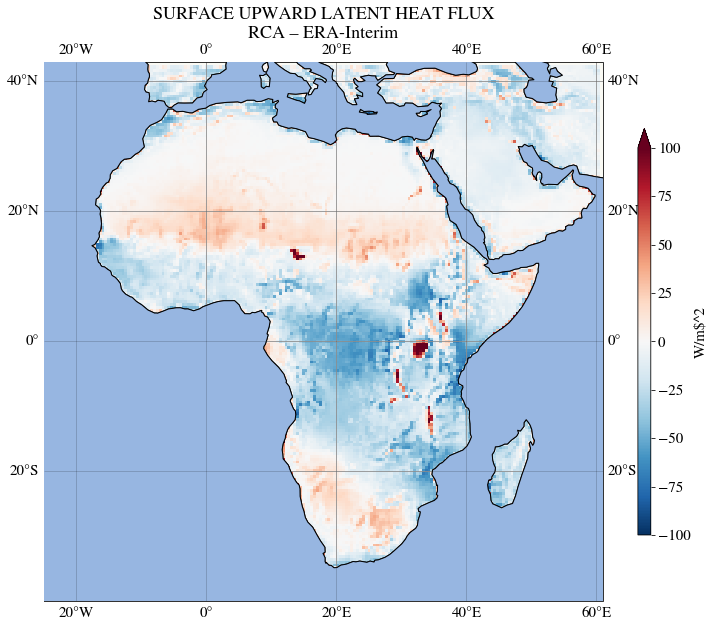

In [72]:
lhf_obs_match = match_coord(lhf_obs,lhf)
clim_diff = (annual_climatology(lhf)- annual_climatology(lhf_obs_match))

plot_Africa(clim_diff, 'RdBu_r', 'SURFACE UPWARD LATENT HEAT FLUX\nRCA – ERA-Interim', 
            figtitle ='hfls_clim_diff', vmin=-100, vmax=100)

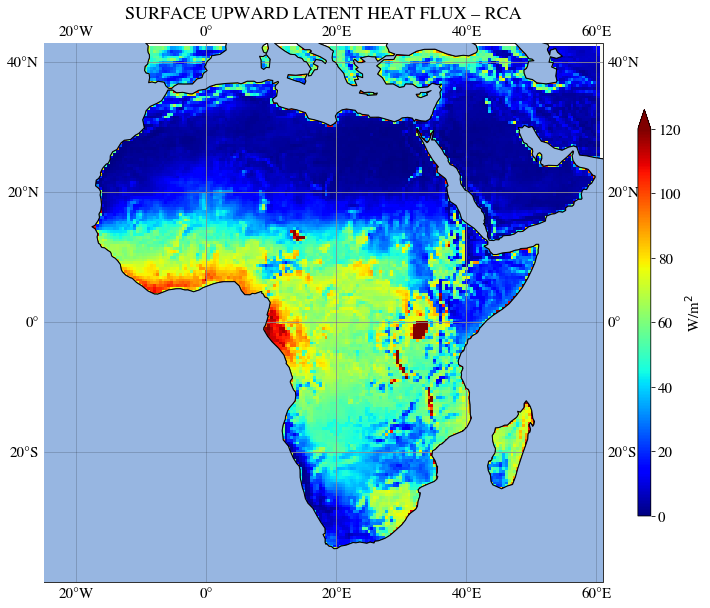

In [39]:
plot_Africa(annual_climatology(lhf), 'jet', 'SURFACE UPWARD LATENT HEAT FLUX – RCA', 
            figtitle ='hfls_clim_RCA', vmin=0, vmax=120)

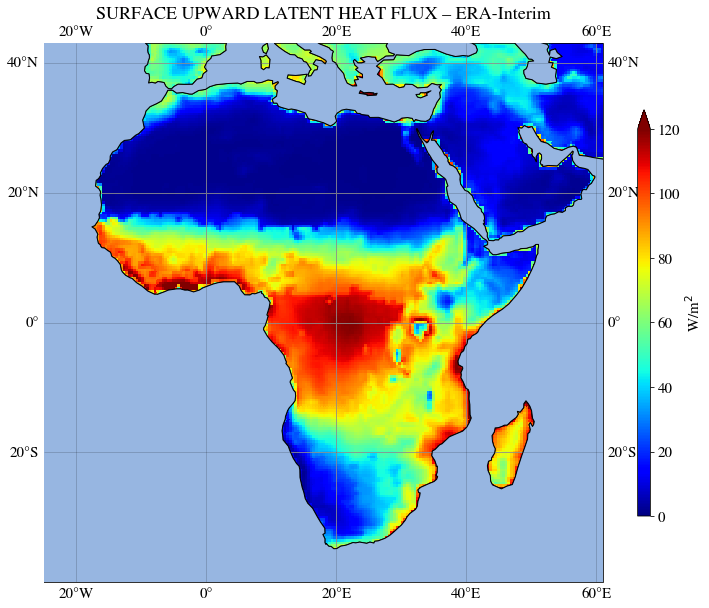

In [40]:
plot_Africa(annual_climatology(lhf_obs), 'jet', 'SURFACE UPWARD LATENT HEAT FLUX – ERA-Interim', 
            figtitle ='hfls_clim_ERA-Interim', vmin=0, vmax=120)

## By season

<ipython-input-53-b119b3e43997>:30: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


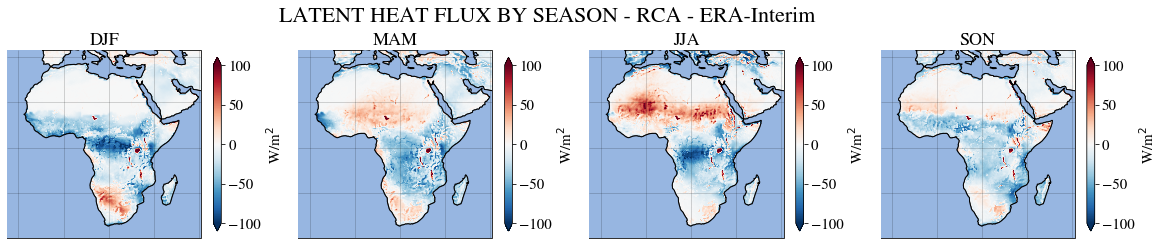

In [63]:
clim_diff_s = (climatology_mean(lhf, "season")- climatology_mean(lhf_obs_match, "season"))

plot_Africa_by_season(clim_diff_s, 'RdBu_r', 'LATENT HEAT FLUX BY SEASON - RCA - ERA-Interim', 
                          figtitle ='hfls_clim_diff_season', vmin=-100, vmax=100)

<ipython-input-53-b119b3e43997>:30: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


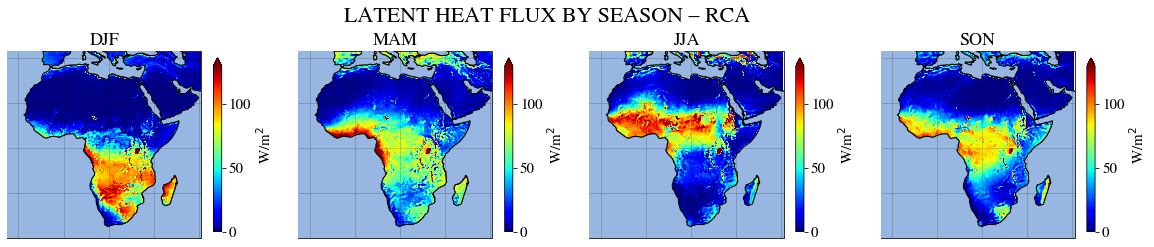

In [60]:
plot_Africa_by_season(climatology_mean(lhf, "season"), 'jet', 'LATENT HEAT FLUX BY SEASON – RCA', 
                          figtitle ='hfls_clim_RCA_season', vmin=0, vmax=130)

<ipython-input-53-b119b3e43997>:30: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


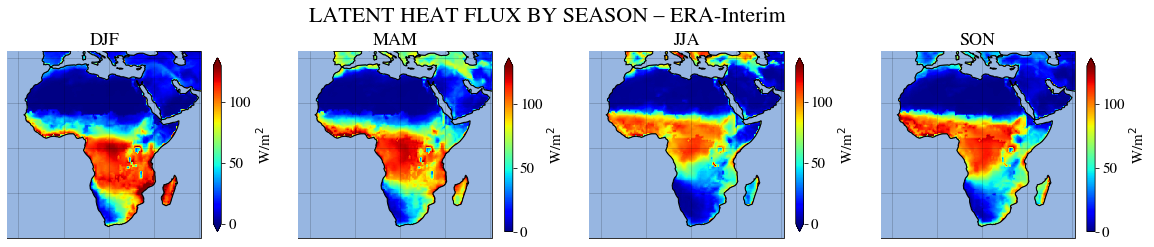

In [55]:
plot_Africa_by_season(climatology_mean(lhf_obs, "season"), 'jet', 'LATENT HEAT FLUX BY SEASON – ERA-Interim', 
                          figtitle ='hfls_clim_ERA-Interim_season', vmin=0, vmax=130)

# Precipitation

In [66]:
fn = 'data/RCA-GUESS/pr_AFR-44_CanESM_VegFB_v2_SMHI-RCA4_v1_mon_201601-202012.nc'
pr = xr.open_dataset(fn)
# from dataset to dataarray
pr=pr['pr']
# to select just the intersectional time between the two datasets:
#.isel(time=slice(0,44))

fn = 'data/ERA-Interim-processed/pr_ERA-Interim_AFR_0.4x0.4_201601-201908.nc'
pr_obs = xr.open_dataset(fn)
# The latent heat flux field seems opposite in sign to expectations, to the model dataset and to litterature
# -> I impose the reflected field
pr_obs = pr_obs['pr']

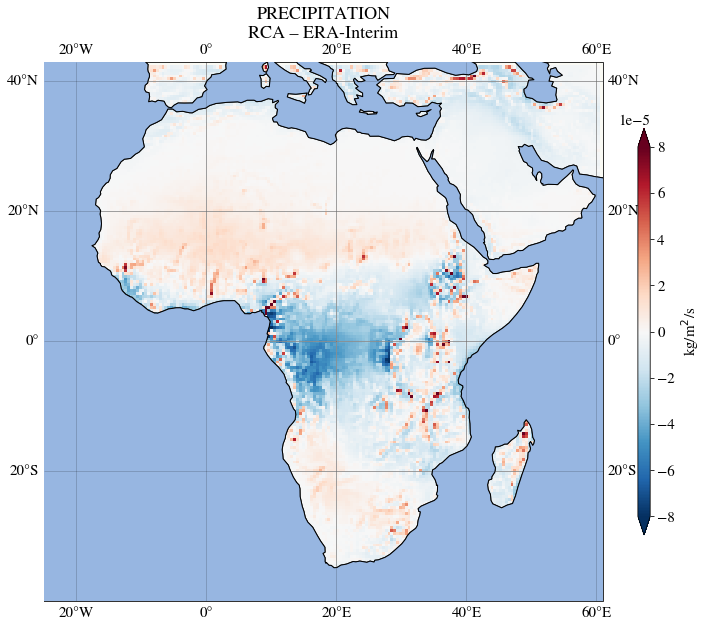

In [77]:
pr_obs_match = match_coord(pr_obs,pr)
clim_diff = (annual_climatology(pr)- annual_climatology(pr_obs_match))

plot_Africa(clim_diff, 'RdBu_r', 'PRECIPITATION\nRCA – ERA-Interim', 
            figtitle ='pr_clim_diff', vmin=-0.00008, vmax=0.00008, units = 'kg/m$^2$/s')

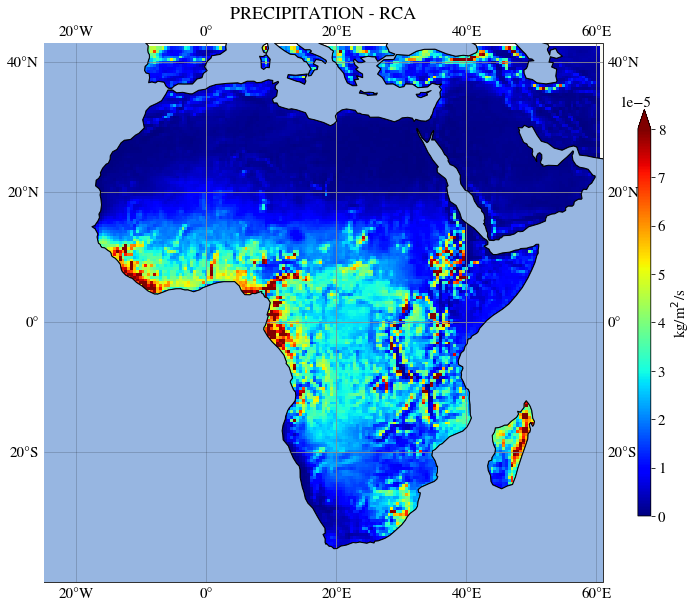

In [76]:
plot_Africa(annual_climatology(pr), 'jet', 'PRECIPITATION - RCA', 
            figtitle ='pr_clim_RCA', vmin=0, vmax=0.00008, units = 'kg/m$^2$/s')

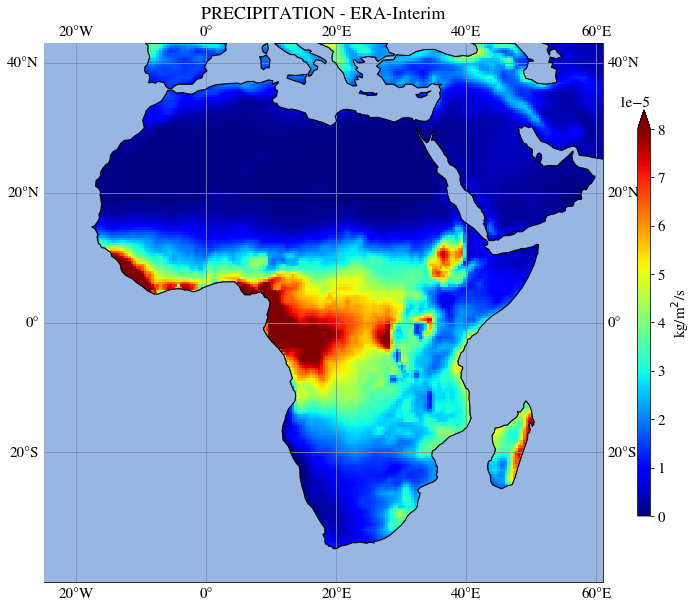

In [78]:
plot_Africa(annual_climatology(pr_obs), 'jet', 'PRECIPITATION - ERA-Interim', 
            figtitle ='pr_clim_ERA-Interim', vmin=0, vmax=0.00008, units = 'kg/m$^2$/s')

<ipython-input-71-2da7ad85e54f>:30: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


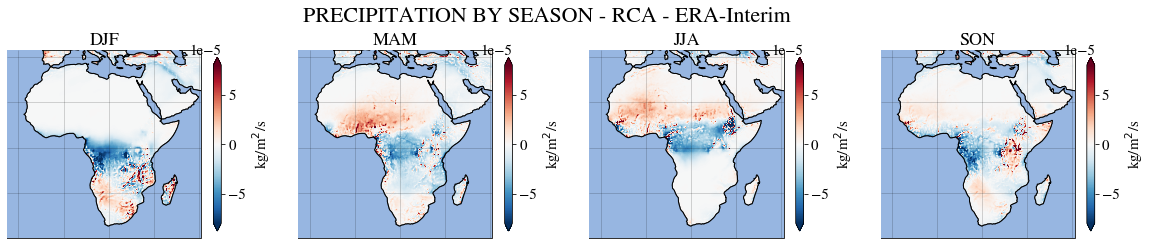

In [81]:
clim_diff_s = (climatology_mean(pr, "season")- climatology_mean(pr_obs_match, "season"))

plot_Africa_by_season(clim_diff_s, 'RdBu_r', 'PRECIPITATION BY SEASON - RCA - ERA-Interim', 
                          figtitle ='pr_clim_diff_season', vmin=-0.00008, vmax=0.00008, units = 'kg/m$^2$/s')

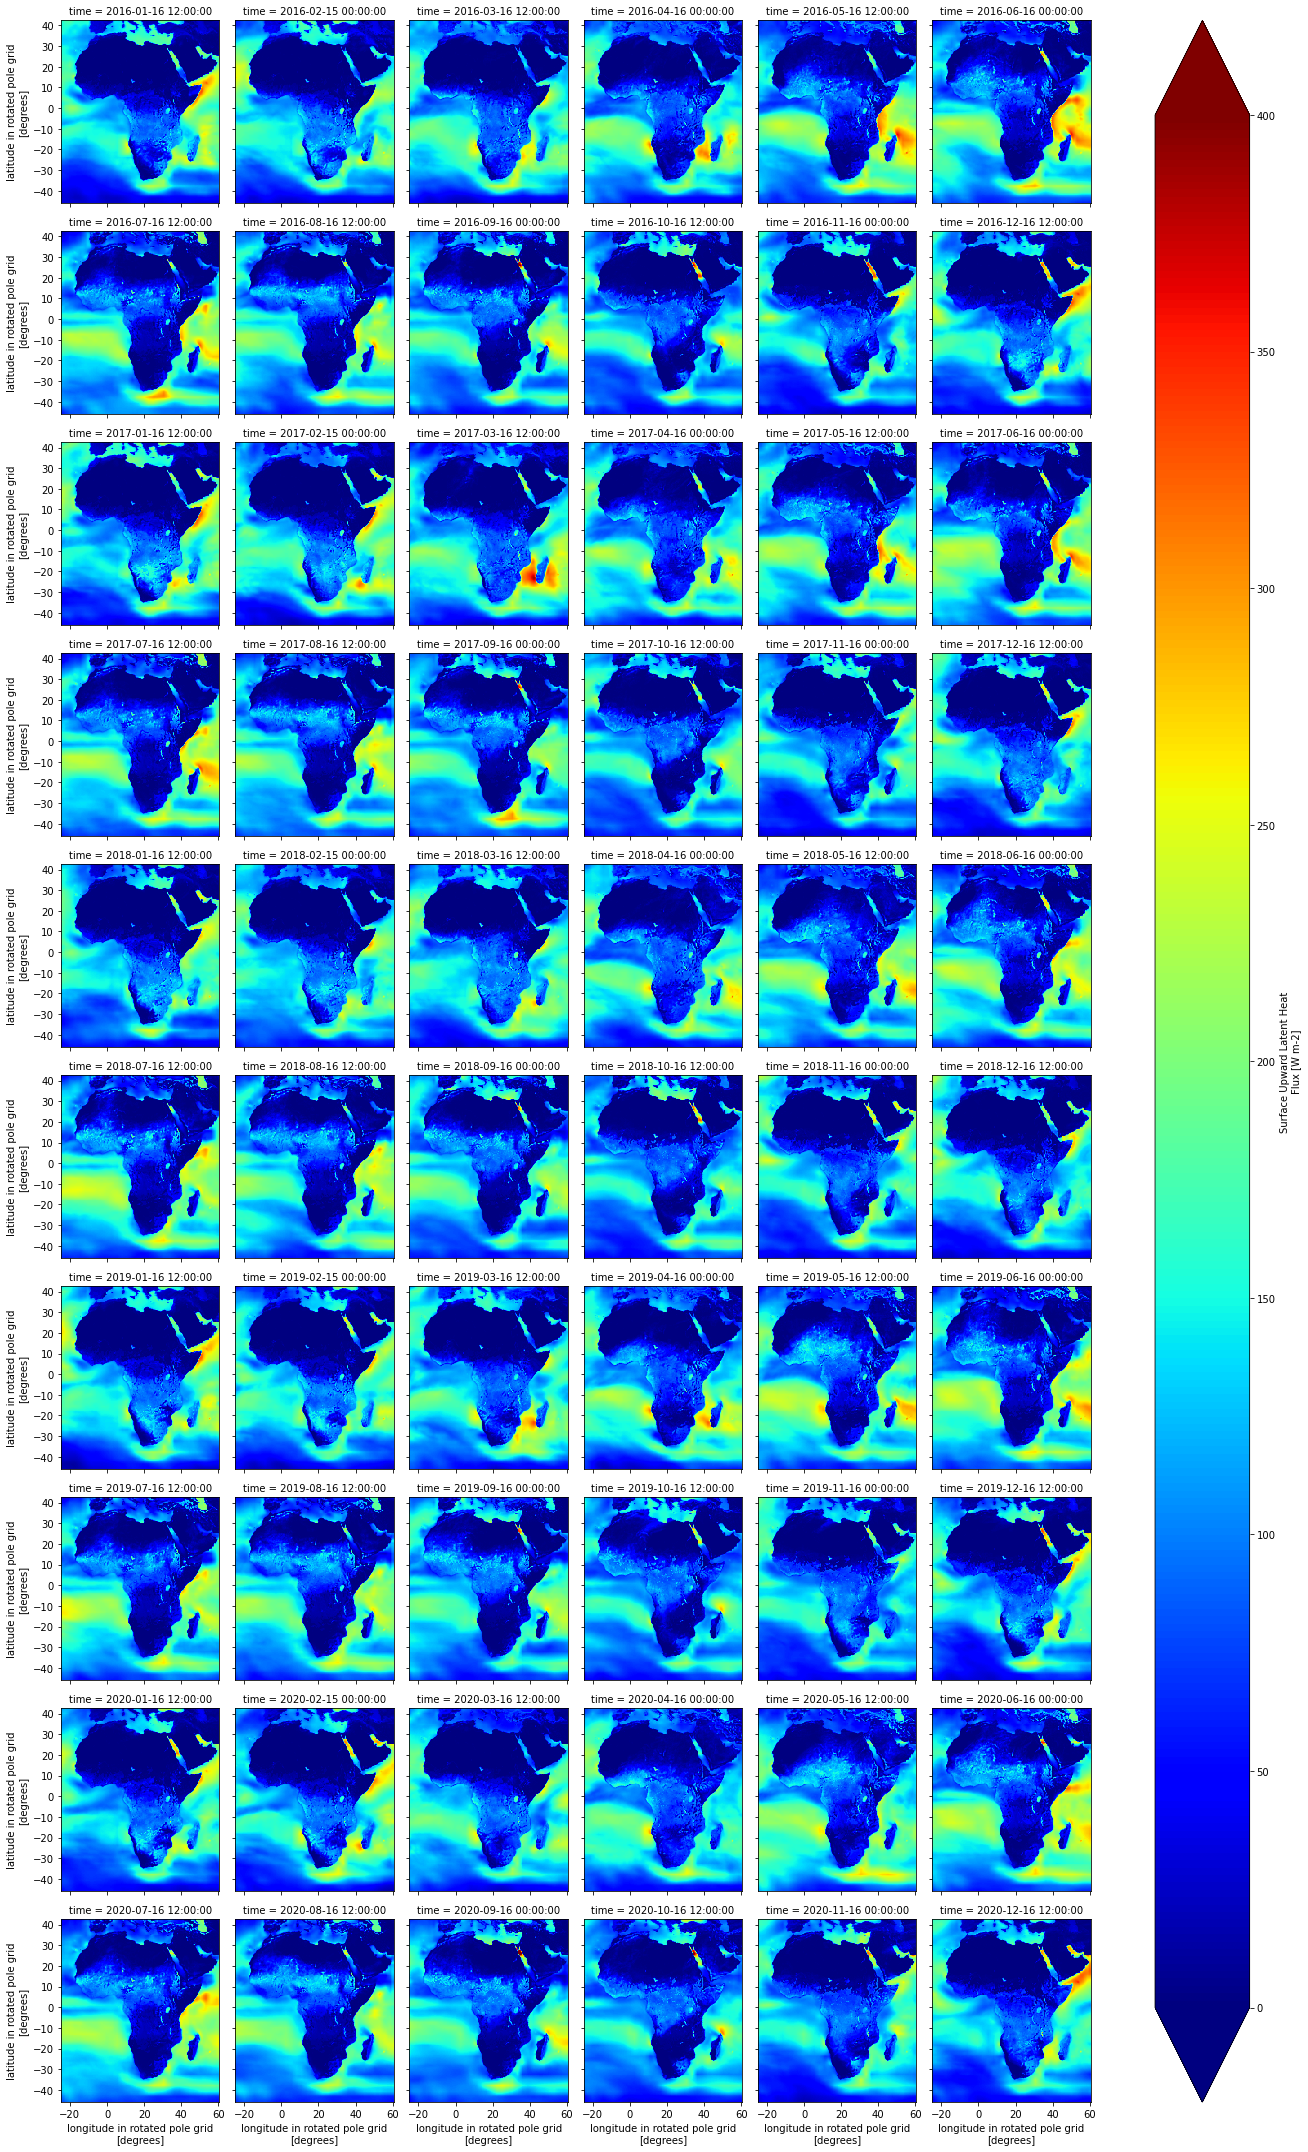

In [40]:
lhf.plot(col='time', col_wrap=6, cmap='jet', vmin=0, vmax=400)#,cbar_kwargs={'location': 'bottom'})
#plt.tight_layout()

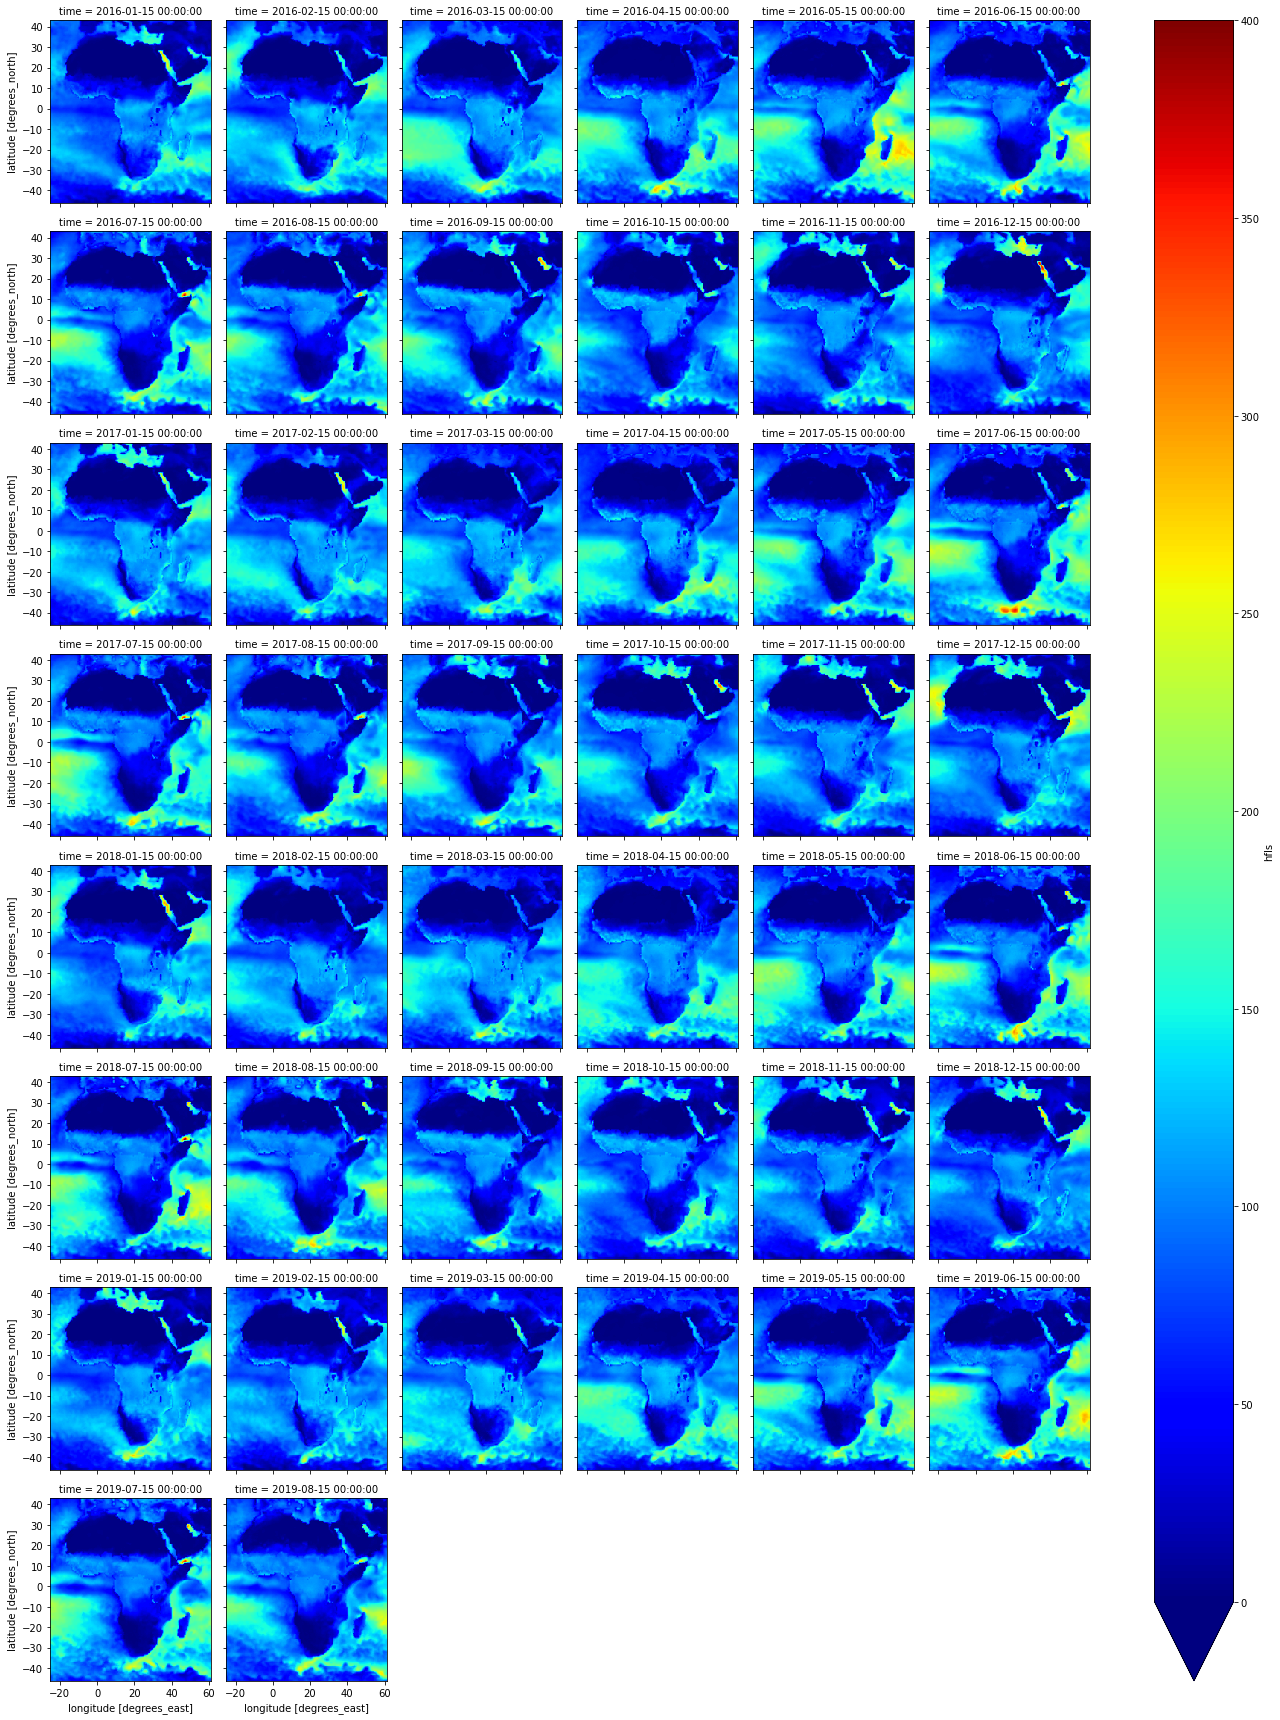

In [41]:
lhf_obs.plot(col='time', col_wrap=6, cmap='jet', vmin=0, vmax=400)

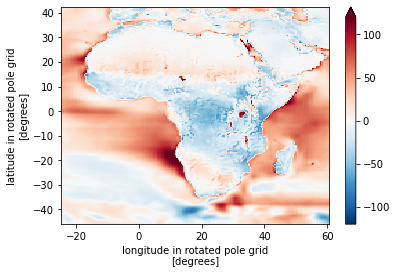

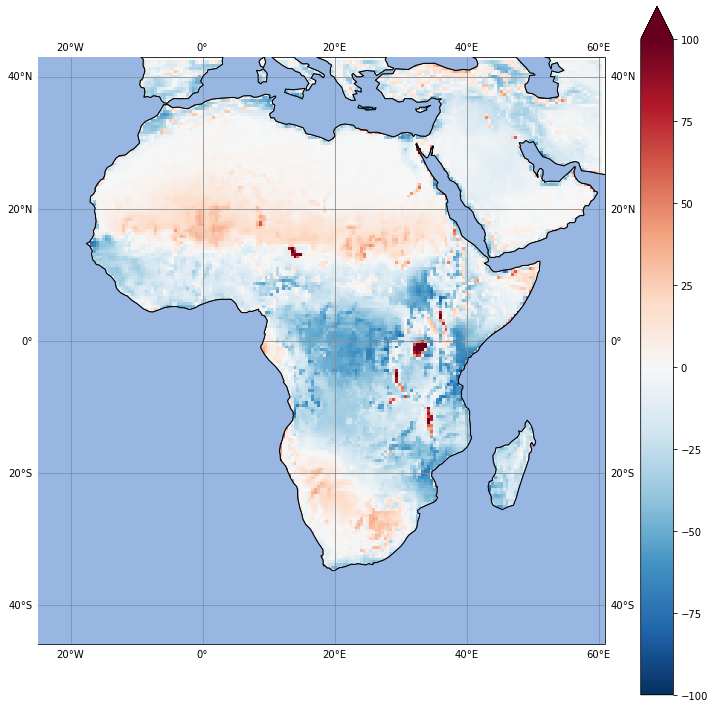

In [158]:
(annual_climatology(lhf)- annual_climatology(lhf_obs2)).plot(vmin=-120, vmax=120, cmap='RdBu_r')

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig, ax = plt.subplots(figsize=[12,12], subplot_kw={'projection': ccrs.PlateCarree()})
#fig = plt.figure(figsize=[15,15])
#ax = plt.axes(projection=ccrs.PlateCarree())
(annual_climatology(lhf)- annual_climatology(lhf_obs2)).plot(ax = ax,vmin=-100, vmax=100, cmap='RdBu_r', transform=ccrs.PlateCarree())
#ax.set_aspect('auto')
ax.set_extent([-25,61, -46,43], crs = ccrs.PlateCarree())
ax_map_properties(ax, gridlines=True, earth=False, rivers=False, borders=False)
gl = ax.gridlines(draw_labels=True)

plt.tight_layout()
plt.show()

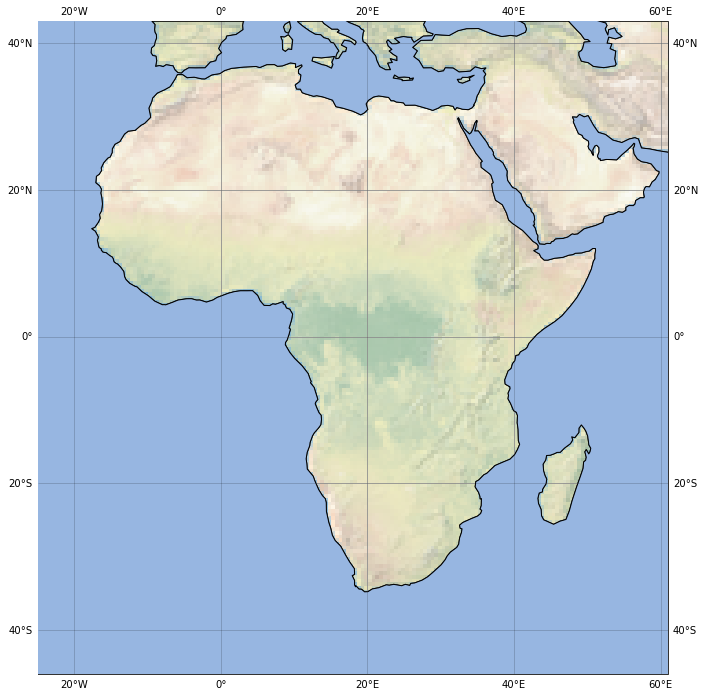

In [160]:
fig, ax = plt.subplots(figsize=[12,12], subplot_kw={'projection': ccrs.PlateCarree()})
#fig = plt.figure(figsize=[15,15])
#ax = plt.axes(projection=ccrs.PlateCarree())
#(annual_climatology(lhf)- annual_climatology(lhf_obs2)).plot(ax = ax,vmin=-100, vmax=100, cmap='RdBu_r', transform=ccrs.PlateCarree())
#ax.set_aspect('auto')
ax_map_properties(ax, gridlines=True, earth=True, rivers=False, borders=False)
gl = ax.gridlines(draw_labels=True)
ax.set_extent([-25,61, -46,43], crs = ccrs.PlateCarree())
plt.show()

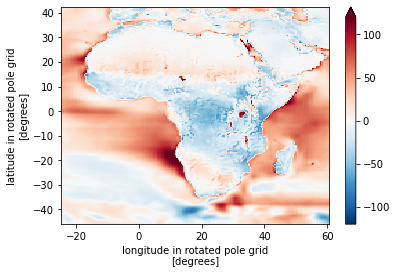

In [96]:
(annual_climatology(lhf)- annual_climatology(lhf_obs2)).plot(vmin=-120, vmax=120, cmap='RdBu_r')

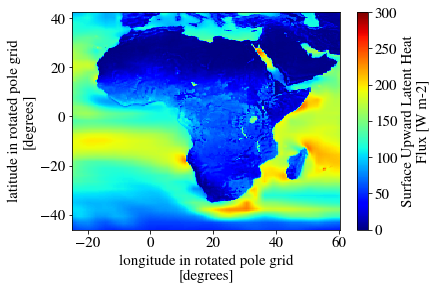

In [19]:
annual_climatology(lhf).plot(cmap='jet', vmin=0, vmax=300)

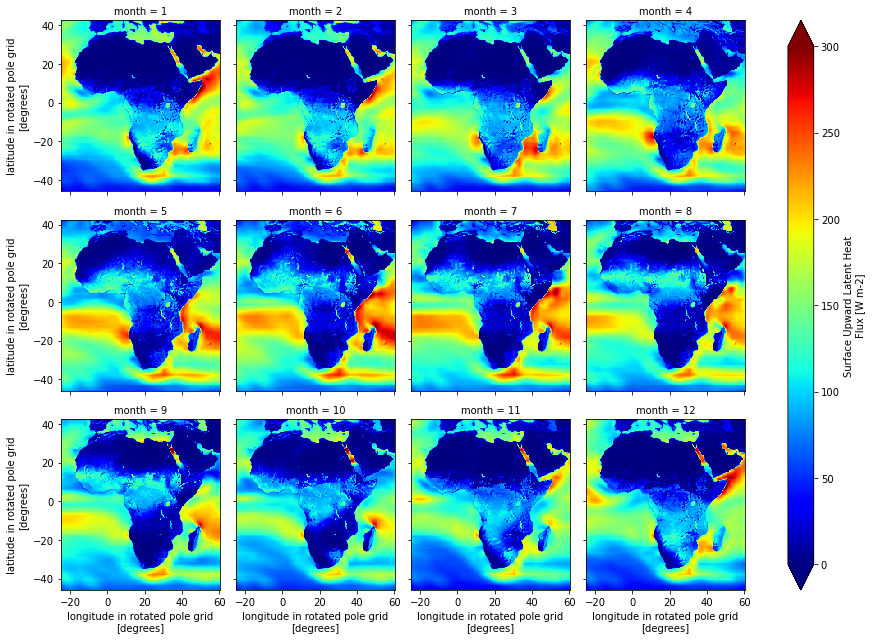

In [45]:
ds = climatology_mean(lhf)
ds.plot(col='month', col_wrap=4, cmap='jet', vmin=0, vmax=300)

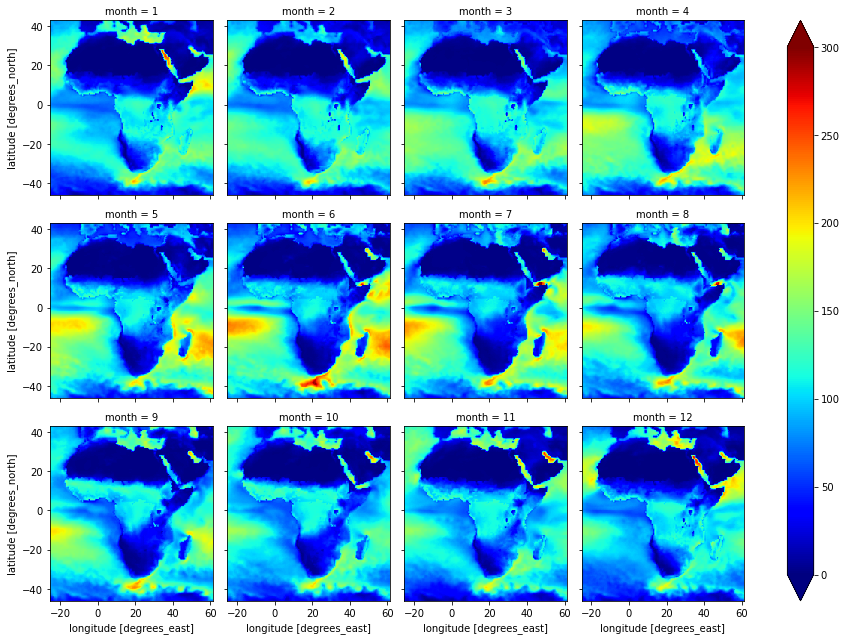

In [46]:
ds = climatology_mean(lhf_obs)
ds.plot(col='month', col_wrap=4, cmap='jet', vmin=0, vmax=300)

In [79]:
def climatology_mean(ds, time_res="month"):  # test for season too
    """Evaluate the 'time_res'-ly (i.e. monthly) mean, weighted on the days"""
    # Make a DataArray with the number of days in each month, size = len(time)
    attrs = ds.attrs
    month_length = ds.time.dt.days_in_month

    # Calculate the weights by grouping by 'time.season'
    weights = month_length.groupby("time."+time_res) / month_length.groupby("time."+time_res).sum()

    # Test that the sum of the weights for each season is 1.0
    np.testing.assert_allclose(weights.groupby("time."+time_res).sum().values, np.ones(len(month_length.groupby("time."+time_res).sum().values)))

    # Calculate the weighted average
    wm = (ds * weights).groupby("time."+time_res).sum(dim="time")
    wm.attrs = attrs
    return wm

def annual_climatology(ds):
    """Evaluate the annual climatological mean, through evaluating the annual cycle first.
    Return an array"""
    attrs = ds.attrs
    ds_clim = climatology_mean(ds, "month")
    m = ds_clim.mean(dim = "month")
    m.attrs = attrs
    return m

def match_coord(original_coord_da, coord_to_match_da, method='linear'):
    """Return DataArray with matching coordinates (lon/lat) with another given DataArray.
    The method used is the interp() of xarray. Different options of interpolation are available.
    Args:
    - original_coord_da (DataArray): variable with coordinates to be matched
    - coord_to_match_da (DataArray): variable with coordinates to match
    - method ({"linear", "nearest", "zero", "slinear", "quadratic", "cubic", "polynomial"},
    default: "linear"): the method used to interpolate.
    """
    new_da = original_coord_da.copy()
    new_da = new_da.interp(lat=coord_to_match_da['rlat'], method = method)
    new_da = new_da.interp(lon=coord_to_match_da['rlon'], method = method)
    return new_da

In [84]:
fn = 'data/RCA-GUESS/pr_AFR-44_CanESM_VegFB_v2_SMHI-RCA4_v1_mon_201601-202012.nc'
pr = xr.open_dataset(fn)
pr = pr['pr']

fn = 'data/ERA-Interim-processed/pr_ERA-Interim_AFR_0.4x0.4_201601-201908.nc'
pr_obs = xr.open_dataset(fn)
pr_obs = pr_obs['pr']
pr_obs2 = match_coord(pr_obs,pr)

In [85]:
pr

<xarray.DataArray 'pr' (time: 60, rlat: 201, rlon: 194)>
[2339640 values with dtype=float32]
Coordinates:
  * time     (time) object 2016-01-16 12:00:00 ... 2020-12-16 12:00:00
    lon      (rlat, rlon) float64 ...
    lat      (rlat, rlon) float64 ...
  * rlon     (rlon) float64 -24.64 -24.2 -23.76 -23.32 ... 59.4 59.84 60.28
  * rlat     (rlat) float64 -45.76 -45.32 -44.88 -44.44 ... 41.36 41.8 42.24
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    units:          kg m-2 s-1
    code:           62
    grid_mapping:   rotated_pole
    cell_methods:   time: mean

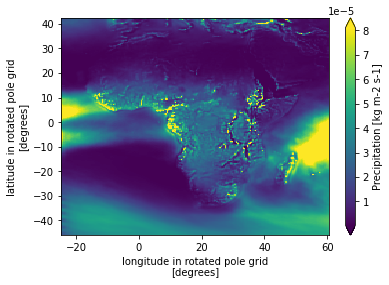

In [90]:
annual_climatology(pr).plot(robust=True)

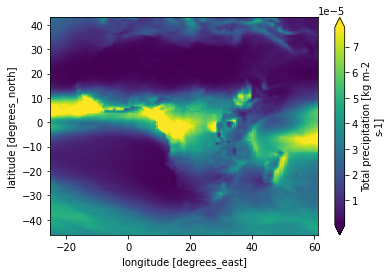

In [91]:
annual_climatology(pr_obs).plot(robust=True)

## What are the potential processes that contribute to the biased simulation of latent heat flux? Explain the possible reason behind these biases.

See evaporation also

## Describe how the biased simulation of latent heat flux could impact the simulated climate in Africa.